In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from datasist.structdata import detect_outliers



In [4]:
df = pd.read_csv('vehicles.csv')


df


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [5]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [5]:
df=df.drop(['image_url','county','url','id','region_url','VIN','posting_date','lat','long','description','region','drive'], axis=1)
df


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,size,type,paint_color,state
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,NaN,sedan,NaN,wy
426876,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,NaN,sedan,red,wy
426877,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy
426878,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,NaN,sedan,silver,wy


In [9]:
df['type'].value_counts(normalize = True)

sedan          0.260630
SUV            0.231374
pickup         0.130261
truck          0.105619
other          0.066193
coupe          0.057493
hatchback      0.049691
wagon          0.032187
van            0.025591
convertible    0.023145
mini-van       0.014445
offroad        0.001823
bus            0.001548
Name: type, dtype: float64

In [12]:

df['type'].replace('bus','other',inplace=True)
df['type'].replace('offroad','other',inplace=True)

In [10]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,size,type,paint_color,state
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,NaN,sedan,NaN,wy
426876,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,NaN,sedan,red,wy
426877,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy
426878,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,NaN,sedan,silver,wy


In [6]:
 def mod(row):
        x=str(row['model']).split(' ')
        return x[0]
      
df['model1'] = df.apply(mod, axis=1)
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,size,type,paint_color,state,model1
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,nan
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,nan
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,nan
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,nan
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,NaN,sedan,NaN,wy,maxima
426876,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,NaN,sedan,red,wy,s60
426877,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy,xt4
426878,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,NaN,sedan,silver,wy,es


In [7]:
df.drop(['state','paint_color','size'], axis=1,inplace=True)

In [8]:
df=df.dropna()
df


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,type,model1
27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,pickup,sierra
28,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,pickup,silverado
29,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,pickup,silverado
30,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,pickup,tundra
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,truck,f-150
...,...,...,...,...,...,...,...,...,...,...,...,...
426864,29590,2016.0,toyota,4runner sr5 sport utility,good,6 cylinders,gas,53475.0,clean,automatic,SUV,4runner
426866,32990,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,clean,automatic,other,qx80
426874,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,automatic,sedan,gs
426875,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,sedan,maxima


In [20]:
df['year'] = df['year'].astype(int)


C:\Users\mazen\AppData\Local\Temp\ipykernel_22860\2994877514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)


In [21]:
def xx(x):
    return 2022-x
df['age']=df['year'].apply(xx)

C:\Users\mazen\AppData\Local\Temp\ipykernel_22860\1926792570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age']=df['year'].apply(xx)


In [23]:
df=df[df['price']>400]

In [24]:
idx = ['odometer','price','age']
outliers_indices = detect_outliers(df, 0, idx)
len(outliers_indices)

8180

In [25]:
df.drop(outliers_indices, inplace=True)
df

C:\Users\mazen\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,type,model1,age
27,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,pickup,sierra,8
28,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,pickup,silverado,12
29,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,pickup,silverado,2
30,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,pickup,tundra,5
31,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,truck,f-150,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426864,29590,2016,toyota,4runner sr5 sport utility,good,6 cylinders,gas,53475.0,clean,automatic,SUV,4runner,6
426866,32990,2016,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,clean,automatic,other,qx80,6
426874,33590,2018,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,automatic,sedan,gs,4
426875,23590,2019,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,sedan,maxima,3


<AxesSubplot:xlabel='price'>

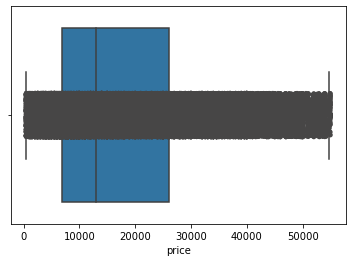

In [26]:
sns.boxplot(x='price', data=df)
sns.stripplot(x='price', data=df, color="#474646")

<AxesSubplot:xlabel='age'>

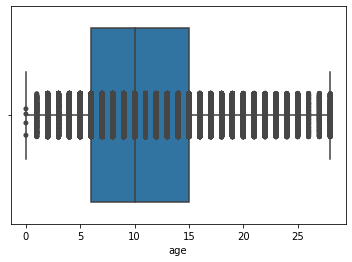

In [27]:
sns.boxplot(x='age', data=df)
sns.stripplot(x='age', data=df, color="#474646")

<AxesSubplot:xlabel='odometer'>

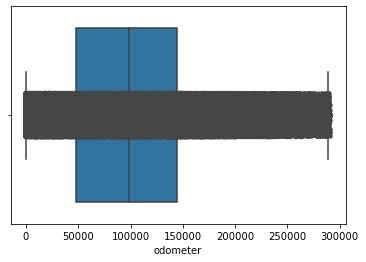

In [28]:
sns.boxplot(x='odometer', data=df)
sns.stripplot(x='odometer', data=df, color="#474646")

In [29]:
df['type'].value_counts()

sedan          35617
SUV            31416
pickup         17781
truck          14436
coupe           7874
other           7033
hatchback       4897
van             3631
convertible     3098
mini-van        3007
wagon           2985
Name: type, dtype: int64

In [30]:
df['cylinders'] = df['cylinders'].str.replace('cylinders', '').str.strip()
df

C:\Users\mazen\AppData\Local\Temp\ipykernel_22860\1471189168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cylinders'] = df['cylinders'].str.replace('cylinders', '').str.strip()


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,type,model1,age
27,33590,2014,gmc,sierra 1500 crew cab slt,good,8,gas,57923.0,clean,other,pickup,sierra,8
28,22590,2010,chevrolet,silverado 1500,good,8,gas,71229.0,clean,other,pickup,silverado,12
29,39590,2020,chevrolet,silverado 1500 crew,good,8,gas,19160.0,clean,other,pickup,silverado,2
30,30990,2017,toyota,tundra double cab sr,good,8,gas,41124.0,clean,other,pickup,tundra,5
31,15000,2013,ford,f-150 xlt,excellent,6,gas,128000.0,clean,automatic,truck,f-150,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426864,29590,2016,toyota,4runner sr5 sport utility,good,6,gas,53475.0,clean,automatic,SUV,4runner,6
426866,32990,2016,infiniti,qx80 sport utility 4d,good,8,gas,55612.0,clean,automatic,other,qx80,6
426874,33590,2018,lexus,gs 350 sedan 4d,good,6,gas,30814.0,clean,automatic,sedan,gs,4
426875,23590,2019,nissan,maxima s sedan 4d,good,6,gas,32226.0,clean,other,sedan,maxima,3


In [31]:
filt = df['condition'].apply(lambda x: x in ['fair', 'salvage','new'])
filt

27        False
28        False
29        False
30        False
31        False
          ...  
426864    False
426866    False
426874    False
426875    False
426878    False
Name: condition, Length: 131775, dtype: bool

In [32]:
outliers = df[filt].index
df.drop(outliers, inplace = True)

C:\Users\mazen\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

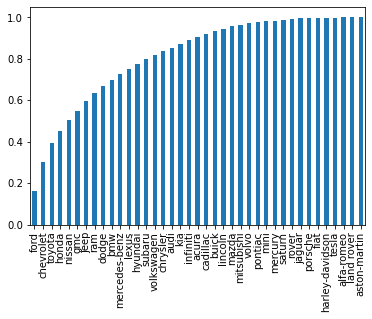

In [33]:
df['manufacturer'].value_counts(normalize = True).cumsum().plot(kind = 'bar')

In [34]:
categories = df['manufacturer'].value_counts(normalize = True).cumsum().loc[:'mercury'].index
categories

Index(['ford', 'chevrolet', 'toyota', 'honda', 'nissan', 'gmc', 'jeep', 'ram',
       'dodge', 'bmw', 'mercedes-benz', 'lexus', 'hyundai', 'subaru',
       'volkswagen', 'chrysler', 'audi', 'kia', 'infiniti', 'acura',
       'cadillac', 'buick', 'lincoln', 'mazda', 'mitsubishi', 'volvo',
       'pontiac', 'mini', 'mercury'],
      dtype='object')

In [35]:
filt = df['manufacturer'].apply(lambda x: x not in categories)
filt.mean()

0.015005241664189263

In [36]:
outliers = df[filt].index
df.drop(outliers, inplace = True)
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,type,model1,age
27,33590,2014,gmc,sierra 1500 crew cab slt,good,8,gas,57923.0,clean,other,pickup,sierra,8
28,22590,2010,chevrolet,silverado 1500,good,8,gas,71229.0,clean,other,pickup,silverado,12
29,39590,2020,chevrolet,silverado 1500 crew,good,8,gas,19160.0,clean,other,pickup,silverado,2
30,30990,2017,toyota,tundra double cab sr,good,8,gas,41124.0,clean,other,pickup,tundra,5
31,15000,2013,ford,f-150 xlt,excellent,6,gas,128000.0,clean,automatic,truck,f-150,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426864,29590,2016,toyota,4runner sr5 sport utility,good,6,gas,53475.0,clean,automatic,SUV,4runner,6
426866,32990,2016,infiniti,qx80 sport utility 4d,good,8,gas,55612.0,clean,automatic,other,qx80,6
426874,33590,2018,lexus,gs 350 sedan 4d,good,6,gas,30814.0,clean,automatic,sedan,gs,4
426875,23590,2019,nissan,maxima s sedan 4d,good,6,gas,32226.0,clean,other,sedan,maxima,3


In [37]:
df['cylinders'].value_counts(normalize = True)

6        0.416555
4        0.298307
8        0.269412
5        0.007124
10       0.004940
other    0.001787
3        0.001604
12       0.000270
Name: cylinders, dtype: float64

In [38]:
pd.options.display.max_rows = None
print(df['model1'].value_counts())
pd.options.display.max_rows = 10

silverado             5789
1500                  3516
sierra                3364
wrangler              2961
f150                  2546
grand                 2423
f-150                 2405
accord                2011
civic                 1851
camry                 1776
tacoma                1699
mustang               1683
tundra                1461
escape                1339
altima                1329
explorer              1182
focus                 1176
corvette              1145
benz                  1079
fusion                1079
4runner               1069
camaro                1030
corolla               1028
impala                1009
tahoe                 1002
mdx                    988
super                  978
challenger             940
equinox                922
yukon                  894
2500                   889
prius                  855
colorado               854
odyssey                837
cruze                  835
transit                830
expedition             829
m

In [39]:
series = df['model1'].value_counts(normalize = False)
filt = series >= 40
categories = series[filt].index
categories

Index(['silverado', '1500', 'sierra', 'wrangler', 'f150', 'grand', 'f-150',
       'accord', 'civic', 'camry',
       ...
       'firebird', 'gx470', 'ml350', 'nv', 'e-150', 'sprinter', '330i',
       'e-350', 'c300', 'mark'],
      dtype='object', length=329)

In [40]:
filt = df['model1'].apply(lambda x: x not in categories)
outliers = df[filt].index
df.drop(outliers, inplace = True)
df

C:\Users\mazen\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,type,model1,age
27,33590,2014,gmc,sierra 1500 crew cab slt,good,8,gas,57923.0,clean,other,pickup,sierra,8
28,22590,2010,chevrolet,silverado 1500,good,8,gas,71229.0,clean,other,pickup,silverado,12
29,39590,2020,chevrolet,silverado 1500 crew,good,8,gas,19160.0,clean,other,pickup,silverado,2
30,30990,2017,toyota,tundra double cab sr,good,8,gas,41124.0,clean,other,pickup,tundra,5
31,15000,2013,ford,f-150 xlt,excellent,6,gas,128000.0,clean,automatic,truck,f-150,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426864,29590,2016,toyota,4runner sr5 sport utility,good,6,gas,53475.0,clean,automatic,SUV,4runner,6
426866,32990,2016,infiniti,qx80 sport utility 4d,good,8,gas,55612.0,clean,automatic,other,qx80,6
426874,33590,2018,lexus,gs 350 sedan 4d,good,6,gas,30814.0,clean,automatic,sedan,gs,4
426875,23590,2019,nissan,maxima s sedan 4d,good,6,gas,32226.0,clean,other,sedan,maxima,3


In [41]:
df['fuel'].value_counts(normalize = True)

gas         0.918269
diesel      0.042731
other       0.026457
hybrid      0.011443
electric    0.001101
Name: fuel, dtype: float64

In [42]:
df['fuel'].replace('electric','other',inplace=True)
df['fuel'].replace('hybrid','other',inplace=True)

C:\Users\mazen\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [43]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,type,model1,age
27,33590,2014,gmc,sierra 1500 crew cab slt,good,8,gas,57923.0,clean,other,pickup,sierra,8
28,22590,2010,chevrolet,silverado 1500,good,8,gas,71229.0,clean,other,pickup,silverado,12
29,39590,2020,chevrolet,silverado 1500 crew,good,8,gas,19160.0,clean,other,pickup,silverado,2
30,30990,2017,toyota,tundra double cab sr,good,8,gas,41124.0,clean,other,pickup,tundra,5
31,15000,2013,ford,f-150 xlt,excellent,6,gas,128000.0,clean,automatic,truck,f-150,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426864,29590,2016,toyota,4runner sr5 sport utility,good,6,gas,53475.0,clean,automatic,SUV,4runner,6
426866,32990,2016,infiniti,qx80 sport utility 4d,good,8,gas,55612.0,clean,automatic,other,qx80,6
426874,33590,2018,lexus,gs 350 sedan 4d,good,6,gas,30814.0,clean,automatic,sedan,gs,4
426875,23590,2019,nissan,maxima s sedan 4d,good,6,gas,32226.0,clean,other,sedan,maxima,3


In [44]:
df['cylinders'].value_counts(normalize = True)

6        0.415022
4        0.300071
8        0.270607
5        0.006612
10       0.004537
3        0.001521
other    0.001512
12       0.000118
Name: cylinders, dtype: float64

TypeError: dropna() got an unexpected keyword argument 'normalize'

In [45]:
filt = df['cylinders'].apply(lambda x: x not in ['4', '6', '8'])
filt.mean()

0.01429951690821256

In [46]:
outliers = df[filt].index
df.drop(outliers, inplace = True)
df

C:\Users\mazen\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,type,model1,age
27,33590,2014,gmc,sierra 1500 crew cab slt,good,8,gas,57923.0,clean,other,pickup,sierra,8
28,22590,2010,chevrolet,silverado 1500,good,8,gas,71229.0,clean,other,pickup,silverado,12
29,39590,2020,chevrolet,silverado 1500 crew,good,8,gas,19160.0,clean,other,pickup,silverado,2
30,30990,2017,toyota,tundra double cab sr,good,8,gas,41124.0,clean,other,pickup,tundra,5
31,15000,2013,ford,f-150 xlt,excellent,6,gas,128000.0,clean,automatic,truck,f-150,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426864,29590,2016,toyota,4runner sr5 sport utility,good,6,gas,53475.0,clean,automatic,SUV,4runner,6
426866,32990,2016,infiniti,qx80 sport utility 4d,good,8,gas,55612.0,clean,automatic,other,qx80,6
426874,33590,2018,lexus,gs 350 sedan 4d,good,6,gas,30814.0,clean,automatic,sedan,gs,4
426875,23590,2019,nissan,maxima s sedan 4d,good,6,gas,32226.0,clean,other,sedan,maxima,3


In [63]:
df.drop(['model'], axis=1,inplace=True)

C:\Users\mazen\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [64]:
df

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,type,model1,age
27,33590,2014,gmc,good,8,gas,57923.0,clean,other,pickup,sierra,8
28,22590,2010,chevrolet,good,8,gas,71229.0,clean,other,pickup,silverado,12
29,39590,2020,chevrolet,good,8,gas,19160.0,clean,other,pickup,silverado,2
30,30990,2017,toyota,good,8,gas,41124.0,clean,other,pickup,tundra,5
31,15000,2013,ford,excellent,6,gas,128000.0,clean,automatic,truck,f-150,9
...,...,...,...,...,...,...,...,...,...,...,...,...
426864,29590,2016,toyota,good,6,gas,53475.0,clean,automatic,SUV,4runner,6
426866,32990,2016,infiniti,good,8,gas,55612.0,clean,automatic,other,qx80,6
426874,33590,2018,lexus,good,6,gas,30814.0,clean,automatic,sedan,gs,4
426875,23590,2019,nissan,good,6,gas,32226.0,clean,other,sedan,maxima,3


In [67]:
df = pd.get_dummies(df, columns=[ 'manufacturer','condition','cylinders','title_status','type','fuel','transmission','model1'], drop_first=True)
df

,price,year,odometer,age,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,...,model1_xc70,model1_xc90,model1_xt5,model1_xterra,model1_xts,model1_xv,model1_yaris,model1_yukon,model1_z3,model1_z4
27,33590,2014,57923.0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,22590,2010,71229.0,12,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
29,39590,2020,19160.0,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
30,30990,2017,41124.0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,15000,2013,128000.0,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426864,29590,2016,53475.0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426866,32990,2016,55612.0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426874,33590,2018,30814.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426875,23590,2019,32226.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:

from sklearn.model_selection import train_test_split

In [84]:
x = df.drop('price', axis=1)
y = df['price']

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [86]:
# from sklearn.decomposition import PCA

# pca = PCA(0.9)

# pca.fit(x_train)

# x_train = pca.transform(x_train)
# x_test = pca.transform(x_test)

In [87]:
x_train.shape

(87992, 382)

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    'LR': LinearRegression(),
    'DT': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
#     'SVM': SVR(), 
    'RF': RandomForestRegressor(n_estimators=120),
    'XGB': XGBRegressor()
}

for name, model in models.items():
    print(f'Training {name}...')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'Testing MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'Testing R2: {r2_score(y_test, y_pred)}')
    print('-'*50)

Training LR...
Testing RMSE: 4844.456239707122
Testing MAE: 3459.0168567325304
Testing R2: 0.8436862263692724
--------------------------------------------------
Training DT...
Testing RMSE: 3755.3039668790775
Testing MAE: 1675.899556766514
Testing R2: 0.9060715046880935
--------------------------------------------------
Training KNN...
Testing RMSE: 3717.736845531359
Testing MAE: 1970.1681497391837
Testing R2: 0.9079413791273483
--------------------------------------------------
Training RF...
Testing RMSE: 2936.69257594424
Testing MAE: 1426.2915209347987
Testing R2: 0.9425587153943872
--------------------------------------------------
Training XGB...
Testing RMSE: 3547.4343576175925
Testing MAE: 2291.0353610494703
Testing R2: 0.9161822672562634
--------------------------------------------------


In [ ]:
# n_estimators = [5,20,50,100] # number of trees in the random forest
# max_features = ['auto', 'sqrt'] # number of features in consideration at every split
# max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
# min_samples_split = [2, 6, 10] # minimum sample number to split a node
# min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
# bootstrap = [True, False] # method used to sample data points

# random_grid = {'n_estimators': n_estimators,

# 'max_features': max_features,

# 'max_depth': max_depth,

# 'min_samples_split': min_samples_split,

# 'min_samples_leaf': min_samples_leaf,

# 'bootstrap': bootstrap}

In [ ]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
 rf_random.fit(x_train, y_train)

In [ ]:
print ('Random grid: ', random_grid, '\n')
print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

(Best Parameters: n_estimators = 100, min_samples_split = 2, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 120, bootstrap=True)

In [91]:
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 120, bootstrap=True) 
randmf.fit( x_train, y_train) 
y_pred = randmf.predict(x_test)
print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Testing MAE: {mean_absolute_error(y_test, y_pred)}')

print(f'Testing R2: {r2_score(y_test, y_pred)}')
print('-'*50)

Testing RMSE: 2881.495546986065
Testing MAE: 1413.4999475746622
Testing R2: 0.9446977146557194
--------------------------------------------------


In [93]:
import joblib
joblib.dump(scaler, 'scaler.h5')
joblib.dump(randmf, 'model.h5')
        

['model.h5']

In [ ]:
df2.to_csv ('clean final2.csv', index = None, header=True) 
